In [2]:
#import
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from itertools import product
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Ridge
from torch.utils.tensorboard import SummaryWriter


In [3]:
#import dataset
df = pd.read_csv('dataset-ml-25m/dataset.csv')

### Data Prepocessing

In [4]:
#split data and labels 
X = df.drop(['rating'], axis=1)
y = df['rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
#count the numebr of x_train 
print("Number of train set: ", X_train.shape[0])
print("Numebr of test set: ", X_test.shape[0])

pca = PCA(n_components=0.95)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

Number of train set:  10362
Numebr of test set:  3454


In [ ]:
# T-SNE
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=0, perplexity=50, n_iter=500)
X_train_tsne = tsne.fit_transform(X_train)

# Plot the result


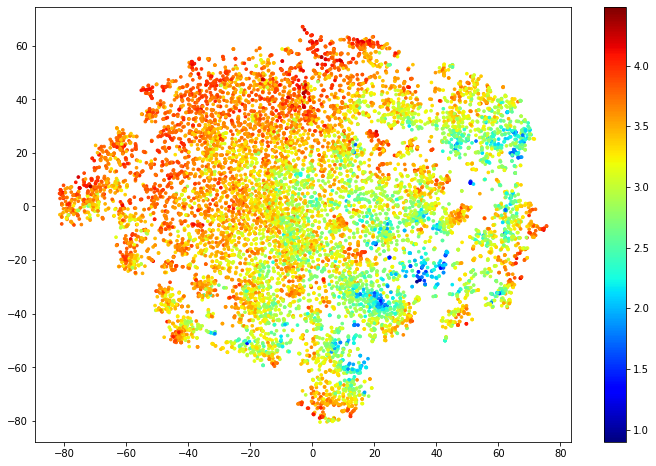

In [10]:
plt.figure(figsize=(12, 8))
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=y_train, cmap="jet", s=7)
plt.colorbar()

plt.show()



### Linear Regressor

In [ ]:
log_name = f"linear_regression"
writer = SummaryWriter(f"results/tradML/pca/LinearRegression/{log_name}")

lin_regr = linear_model.LinearRegression()
lin_regr.fit(X_train, y_train)
y_pred = lin_regr.predict(X_test)

# Compute the RSS
mse = mean_squared_error(y_test, y_pred) 
print('Mean Square Error:', mse)
writer.add_scalar('Loss', mse)
writer.flush()

# Compute the R-square index
rsquare = r2_score(y_test, y_pred) 
print('R-square:', rsquare)


### Random Forest Regressor
TEST SET
Mean Squared Error:  0.03662117019915541

R2 Score:  0.8361367494911226


In [ ]:
param_grid = {
                "n_estimators": [10, 15, 20, 25, 30],
                "criterion": ["squared_error", "friedman_mse"]
              }
rt = RandomForestRegressor()
rt.fit(X_train,y_train)
grid_search = GridSearchCV(rt, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_no_leaves= grid_search.best_params_
print("Best number of leaves: ", best_no_leaves)


In [ ]:
rf = pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['value'])
rf = rf.T
rf.to_csv('random_forest.csv', index=False)

In [ ]:
rt = RandomForestRegressor(n_estimators = 30, criterion = "squared_error")
rt= rt.fit(X_train,y_train)

y_pred= rt.predict(X_train)
print ("TRAIN SET")
print("Mean Squared Error: ", mean_squared_error(y_train, y_pred))
print("R2 Score: ", r2_score(y_train, y_pred))

y_pred= rt.predict(X_test)
print ("TEST SET")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

Prova con diversi parametri per il Random Forest Regressor

In [6]:
param_grid = {
                "n_estimators": [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100],
                "criterion": ["squared_error", "friedman_mse", "poisson"]
              }
rt = RandomForestRegressor()
rt.fit(X_train,y_train)
grid_search = GridSearchCV(rt, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_no_leaves= grid_search.best_params_
print("Best number of leaves: ", best_no_leaves)


In [ ]:
rf = pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['value'])
rf = rf.T
rf.to_csv('best_params/pca/random_forest.csv', index=False)

In [ ]:
rt = RandomForestRegressor(max_depth= 7)
rt= rt.fit(X_train,y_train)

y_pred= rt.predict(X_train)
print ("TRAIN SET")
print("Mean Squared Error: ", mean_squared_error(y_train, y_pred))
print("R2 Score: ", r2_score(y_train, y_pred))

y_pred= rt.predict(X_test)
print ("TEST SET")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

### Decision tree regressor

mse = 0.059635967667036244

r2 = 0.7331558916326424

In [29]:
#search best parameters for decision tree
param_grid = {
                "max_depth": [7,10, 20]
              }
dt = DecisionTreeRegressor()
dt.fit(X_train,y_train)
grid_search = GridSearchCV(dt, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_hyper= grid_search.best_params_
print("Best number of leaves: ", best_hyper)
results = pd.DataFrame(grid_search.cv_results_)
results.to_csv('grid_search_results.csv', index=False)

Best number of leaves:  {'max_depth': 7}


In [30]:
df = pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['value'])
df = df.T
df.to_csv('best_params/pca/decision_tree.csv', index=False)

In [31]:
dt = DecisionTreeRegressor(max_depth= 7)
dt= dt.fit(X_train,y_train)

y_pred= dt.predict(X_train)
print ("TRAIN SET")
print("Mean Squared Error: ", mean_squared_error(y_train, y_pred))
print("R2 Score: ", r2_score(y_train, y_pred))

y_pred= dt.predict(X_test)
print ("TEST SET")
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

TRAIN SET
Mean Squared Error:  0.04609258061576105
R2 Score:  0.8062561153306504
TEST SET
Mean Squared Error:  0.059635967667036244
R2 Score:  0.7331558916326424


### Ridge Regressor
Mean Squared Error:  0.006422342939029505

R2 Score:  0.9712629065606324

In [32]:
param_grid = {
                "alpha":[0.0001, 0.001, 0.1, 0.5, 1, 5, 10, 20]
              }
rt = ridge = Ridge()
rt.fit(X_train,y_train)
grid_search = GridSearchCV(rt, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_hyper= grid_search.best_params_
print("Best number of leaves: ", best_hyper)

Best number of leaves:  {'alpha': 0.1}


In [33]:
rt = pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['value'])
rt = rt.T
rt.to_csv('best_params/pca/ridge.csv', index=False)

In [34]:
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

y_pred = ridge.predict(X_train)
print ("TRAIN SET")
print("Mean Squared Error: ", mean_squared_error(y_train, y_pred))
print("R2 Score: ", r2_score(y_train, y_pred))

print("TEST SET")
y_pred= ridge.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

TRAIN SET
Mean Squared Error:  0.0054952486662387745
R2 Score:  0.9769014707009678
TEST SET
Mean Squared Error:  0.006422342939029505
R2 Score:  0.9712629065606324


### KNN Regressor
Mean Squared Error:  0.04392172471123978

R2 Score:  0.8034700546159548

In [ ]:
param_grid = {
                'n_neighbors': [ 3, 4, 5, 7, 8, 9, 10],
                'weights': ['uniform', 'distance']
              }
knn = KNeighborsRegressor()
knn.fit(X_train,y_train)
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_hyper= grid_search.best_params_
print("Best number of leaves: ", best_hyper)

In [ ]:
knn = pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['value'])
knn = knn.T
knn.to_csv('best_params/pca/knn.csv', index=False)


In [ ]:
knn = KNeighborsRegressor(n_neighbors= 10, weights= 'distance')
knn.fit(X_train, y_train)

y_pred = knn.predict(X_train)
print ("TRAIN SET")
print("Mean Squared Error: ", mean_squared_error(y_train, y_pred))
print("R2 Score: ", r2_score(y_train, y_pred))

print("TEST SET")
y_pred= knn.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))

### Lasso Regressor

Mean Squared Error:  0.006402684362671739

R2 Score:  0.971350869839928

In [ ]:
from sklearn.linear_model import Lasso

param_grid = {
                'alpha':[1e-1, 1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
              }
lasso = Lasso()
lasso.fit(X_train,y_train)
grid_search = GridSearchCV(lasso, param_grid, cv=5)
grid_search.fit(X_train,y_train)
best_hyper= grid_search.best_params_
print("Best values - Hyperparameters: ", best_hyper)

In [ ]:
lasso = pd.DataFrame.from_dict(grid_search.best_params_, orient='index', columns=['value'])
lasso= lasso.T
lasso.to_csv('best_params/pca/lasso.csv', index=False)

In [ ]:
lasso = Lasso(alpha = 1e-05)
lasso.fit(X_train, y_train)

y_pred = lasso.predict(X_train)
print ("TRAIN SET")
print("Mean Squared Error: ", mean_squared_error(y_train, y_pred))
print("R2 Score: ", r2_score(y_train, y_pred))

print("TEST SET")
y_pred= lasso.predict(X_test)
print("Mean Squared Error: ", mean_squared_error(y_test, y_pred))
print("R2 Score: ", r2_score(y_test, y_pred))